In [2]:
from warnings import filterwarnings
import pandas as pd
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x:'%.2f' % x)
pd.set_option('display.width', 200)

In [3]:
df = pd.read_csv("wiki_data.csv", index_col=0)

In [4]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [5]:
df.shape

(10859, 1)

In [6]:
#I work small part of dataset, because dataset is large
df = df[:2000]
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [7]:
df.shape

(2000, 1)

In [8]:
import string
#delete numbers, convert text to lowercase, delete punctuations
def clean_text(text):
    #normalize case folding
    text = text.str.lower()
    #punctuations
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace("\n",'')
    #Delete Numbers
    text = text.str.replace("\n",'')
    return text

In [9]:
df["text"] = clean_text(df["text"]) 

In [10]:
df.head()

,text
1,anovoanovo (formerly a novo) is a computer ser...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pease (august 22, 1940â ..."
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


In [11]:
#Delete stopwords
from nltk.corpus import stopwords
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

In [12]:
df["text"] = remove_stopwords(df["text"])

In [13]:
df.head()

,text
1,anovoanovo (formerly novo) computer services c...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pease (august 22, 1940â ..."
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [14]:
#delete rare words
word_counts = pd.Series(' '.join(df["text"]).split()).value_counts()

In [15]:
word_counts

used             5223
also             4007
one              2859
use              2768
first            2734
                 ... 
m.52                1
sub-sonic           1
attlee's            1
1949.the            1
fluids/solids       1
Name: count, Length: 138856, dtype: int64

In [16]:
delete = pd.Series(' '.join(df["text"]).split()).value_counts()[-1000:]

In [17]:
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

In [18]:
df["text"].head()

1    anovoanovo (formerly novo) computer services c...
2    battery indicatora battery indicator (also kno...
3    bob peaserobert allen pease (august 22, 1940â ...
4    cavnetcavnet secure military forum became oper...
5    clidarthe clidar scientific instrument used me...
Name: text, dtype: object

In [19]:
#Tokenization
from textblob import TextBlob , Word
df["text"].apply(lambda x: TextBlob(x).words)

1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, 22, 1...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frank-kamenetskii, theoryin, combustion, fran...
Name: text, Length: 2000, dtype: object

In [20]:
#Lemmanization
df["text"] = df["text"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))                              
                              

In [21]:
df.head()

,text
1,anovoanovo (formerly novo) computer service co...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pea (august 22, 1940â â€..."
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [22]:
#estimate frekans of words
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [23]:
tf.head()

,index,0
0,company,1862.00
1,anovoanovo,1.00
2,1.6,3.00
3,four,473.00
4,year,907.00


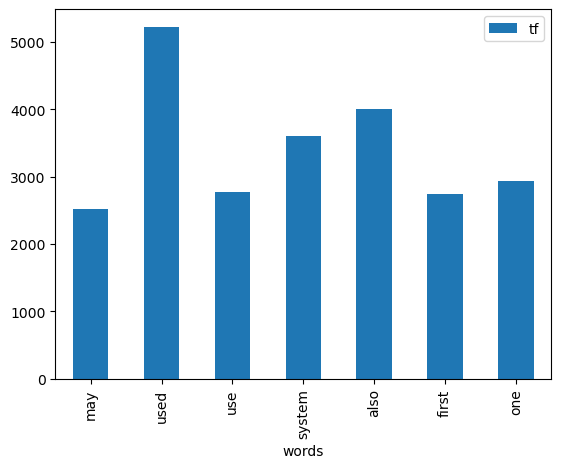

In [24]:
#Barplot
import matplotlib.pyplot as plt
tf.columns = ["words", "tf"]
tf[tf["tf"] > 2000].plot.bar(x="words",y="tf")
plt.show()

In [25]:
#compose words in one sentence
text = " ".join(i for i in df["text"])

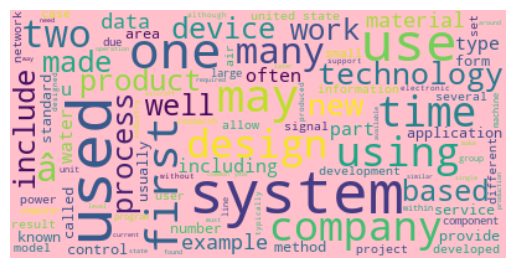

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="pink").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()